In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import initializers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [52]:
def load_data(w,b):
    num_datos=40
    np.random.seed(5)
    error=np.random.normal(0,0.1,num_datos)
    x=np.random.uniform(-1,1,num_datos)
    y=(w*x+b)+error
    
    datos=np.column_stack((x,y))
    
    return datos

In [48]:
def plot_result(title,model,history,x_train, x_test, y_train, y_test):
    figure=plt.figure(figsize=(15, 5))

    loss_axis = figure.add_subplot(121)
    loss_axis.plot(history.history['loss'],label="loss")
    loss_axis.plot(history.history['val_loss'],label="val_loss")
    loss_axis.set_xlabel('Época', fontsize=15,labelpad=20,color="#003B80") 
    loss_axis.set_ylabel('Error cuadrático medio', fontsize=15,labelpad=20,color="#003B80")
    loss_axis.set_title("loss:" + title)
    loss_axis.set_ylim(0,1)

    result_axis = figure.add_subplot(122)
    result_axis.scatter(x_train,y_train,10,color="#E49090")
    result_axis.scatter(x_test,y_test,10,color="#2F984D")
    x=np.linspace(-1,1, 1500)
    y=model.predict(x)
    result_axis.scatter(x,y,5,color="#BF404A")
    result_axis.set_title("resultado:"+title)    

In [49]:
datos=load_data(0.2,0.5)

x_train, x_test, y_train, y_test = train_test_split(datos[:,0], datos[:,1], test_size=0.2,random_state=4)

Creando modelo de  0  capas
Creando modelo de  1  capas
añadiendo  8
Creando modelo de  2  capas
añadiendo  8
añadiendo  8
Creando modelo de  3  capas
añadiendo  8
añadiendo  8
añadiendo  8
Creando modelo de  4  capas
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
Creando modelo de  5  capas
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
Creando modelo de  6  capas
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
Creando modelo de  7  capas
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
Creando modelo de  8  capas
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
Creando modelo de  9  capas
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8
añadiendo  8


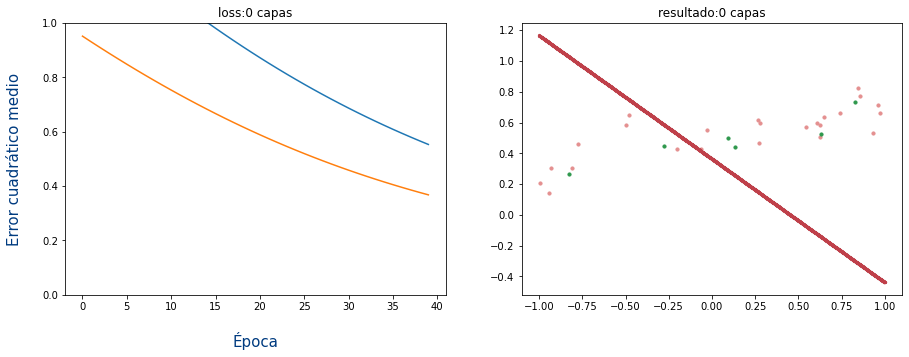

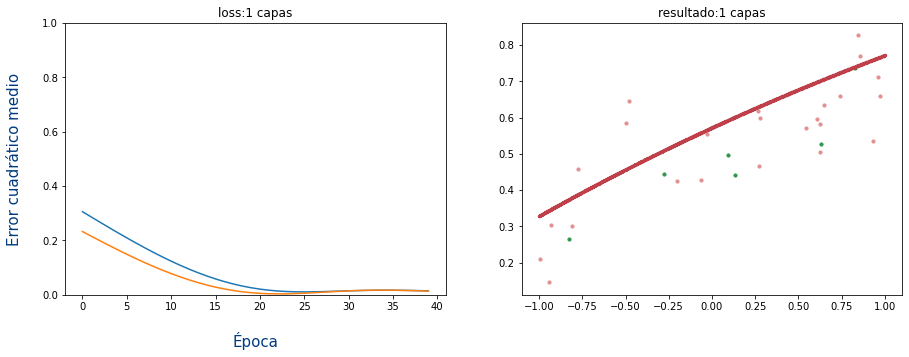

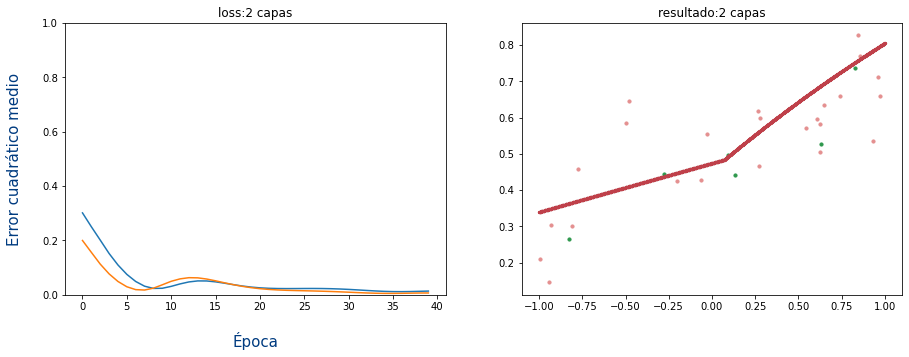

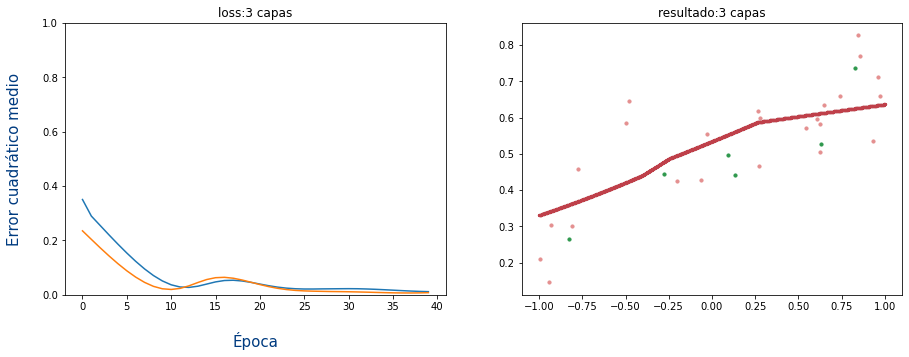

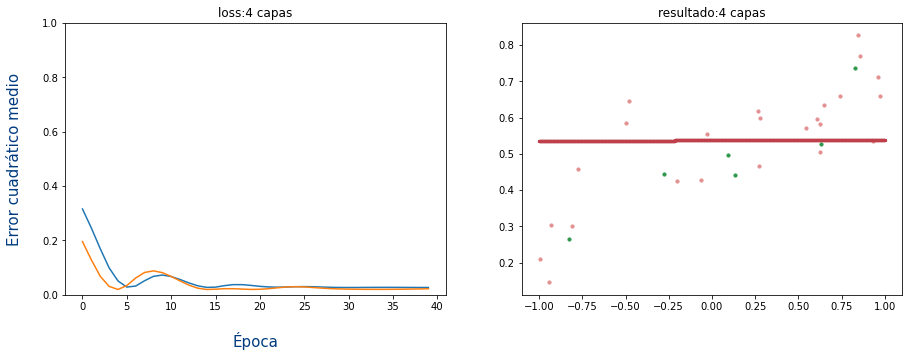

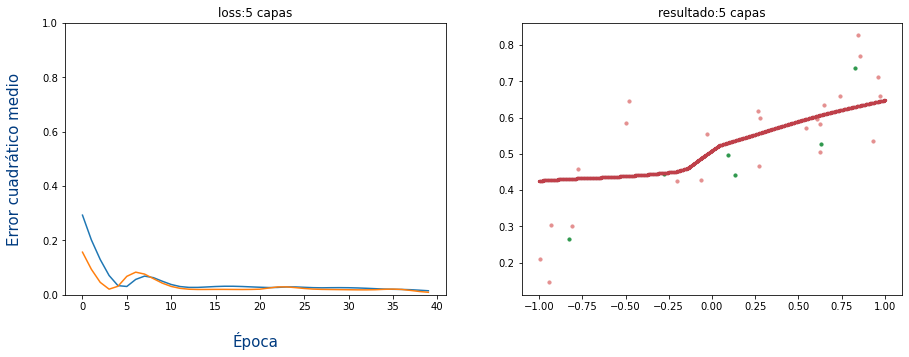

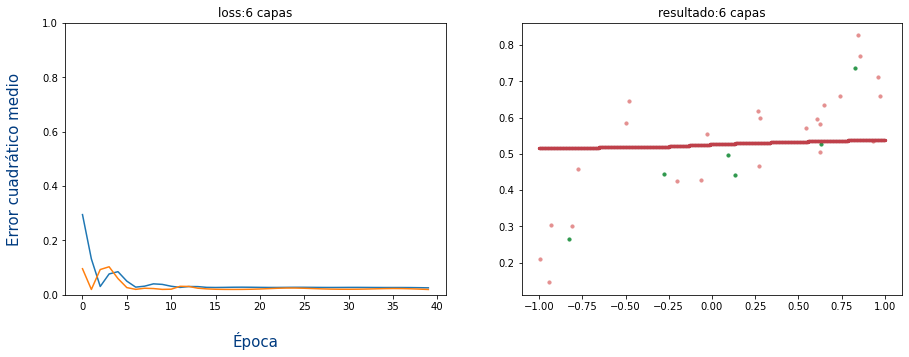

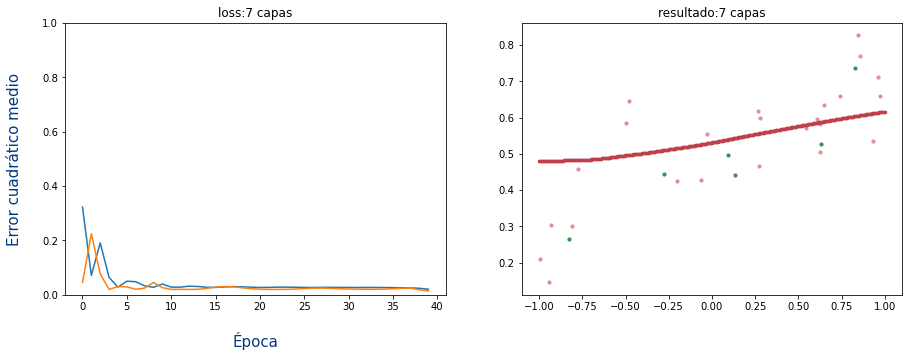

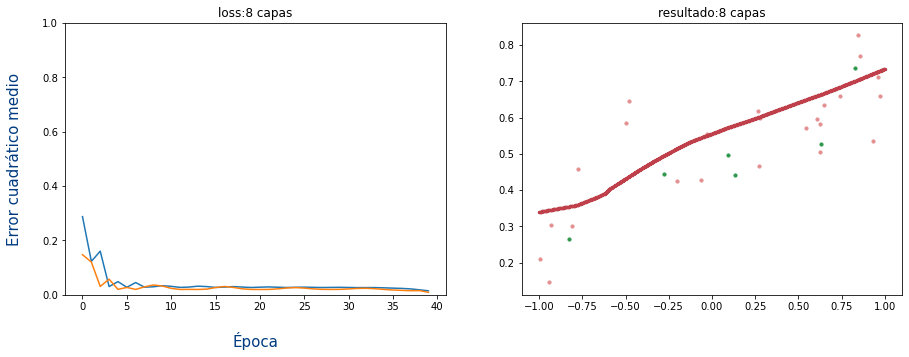

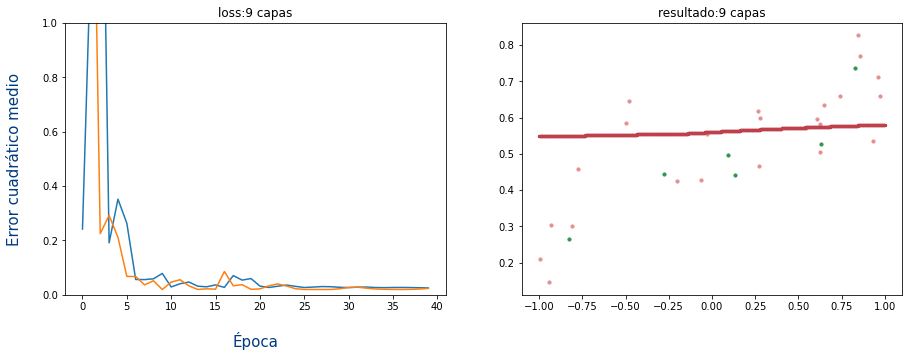

In [51]:
for num_capas in range(10):
    model=keras.models.Sequential()
    print("Creando modelo de " ,num_capas , " capas")
    for num_neuronas in range(0, num_capas):
        print("añadiendo ",8)
        model.add(keras.layers.Dense(2**num_neuronas,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed=4),bias_initializer=initializers.RandomNormal(stddev=0.01,seed=3)))
        model.add(keras.layers.ELU(alpha=3.0))     
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')
    history=model.fit(x=x_train,y=y_train,epochs=40, validation_data=(x_test,y_test),verbose=0)
    plot_result(str(num_capas) + " capas",model,history,x_train, x_test, y_train, y_test)
